In [1]:
# Core Libraries
import pandas as pd
import numpy as np
from scipy import stats

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
import sweetviz as sv
from tqdm import tqdm
import plotly.express as px

# Preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PowerTransformer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.decomposition import PCA

# Models
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

# Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Ensemble
from sklearn.ensemble import VotingRegressor, StackingRegressor

# Others
import warnings
warnings.filterwarnings('ignore')

In [2]:
store_df = pd.read_csv(r'C:\Users\Zarul\Desktop\Data_Analyst\My_Project\Supervised\2_store_sales\store.csv')
train_df = pd.read_csv(r'C:\Users\Zarul\Desktop\Data_Analyst\My_Project\Supervised\2_store_sales\train.csv', low_memory = False)
test_df = pd.read_csv(r'C:\Users\Zarul\Desktop\Data_Analyst\My_Project\Supervised\2_store_sales\test.csv')

In [3]:
#Merged dataset
merged_train_df = train_df.merge(store_df, how='left', on='Store')
merged_test_df = test_df.merge(store_df, how='left', on='Store')

merged_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [4]:
#Parse date (convert object into int)
merged_train_df['Date'] = pd.to_datetime(merged_train_df.Date)
merged_test_df['Date'] = pd.to_datetime(merged_test_df.Date)

merged_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1014567 no

In [5]:
round(merged_train_df.describe().T,2)

,count,mean,min,25%,50%,75%,max,std
Store,1017209.0,558.429727,1.0,280.0,558.0,838.0,1115.0,321.908651
DayOfWeek,1017209.0,3.998341,1.0,2.0,4.0,6.0,7.0,1.997391
Date,1017209,2014-04-11 01:30:42.846061824,2013-01-01 00:00:00,2013-08-17 00:00:00,2014-04-02 00:00:00,2014-12-12 00:00:00,2015-07-31 00:00:00,NaN
Sales,1017209.0,5773.818972,0.0,3727.0,5744.0,7856.0,41551.0,3849.926175
Customers,1017209.0,633.145946,0.0,405.0,609.0,837.0,7388.0,464.411734
Open,1017209.0,0.830107,0.0,1.0,1.0,1.0,1.0,0.375539
Promo,1017209.0,0.381515,0.0,0.0,0.0,1.0,1.0,0.485759
SchoolHoliday,1017209.0,0.178647,0.0,0.0,0.0,0.0,1.0,0.383056
CompetitionDistance,1014567.0,5430.085652,20.0,710.0,2330.0,6890.0,75860.0,7715.3237
CompetitionOpenSinceMonth,693861.0,7.222866,1.0,4.0,8.0,10.0,12.0,3.211832


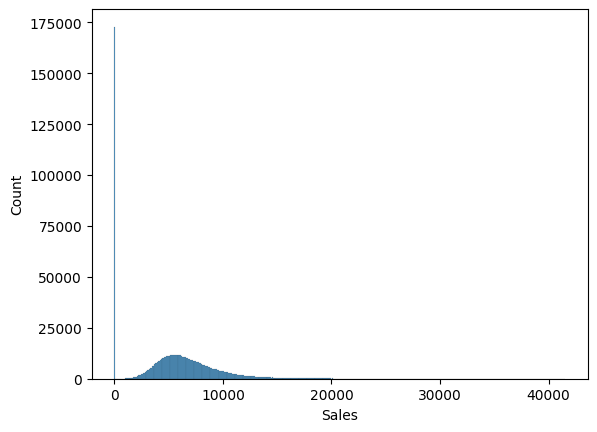

In [6]:
#Data Analysis for value '0' in merged_train_df.Sales
sns.histplot(data = merged_train_df, x = 'Sales')
plt.show()

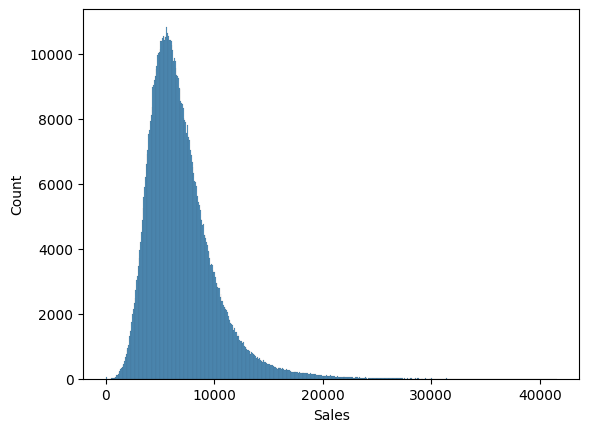

In [7]:
#Ignore O sales considering store is close
merged_train_df = merged_train_df[merged_train_df.Open==1].copy()
sns.histplot(data = merged_train_df, x = 'Sales')
plt.show()

                                             |          | [  0%]   00:00 -> (? left)


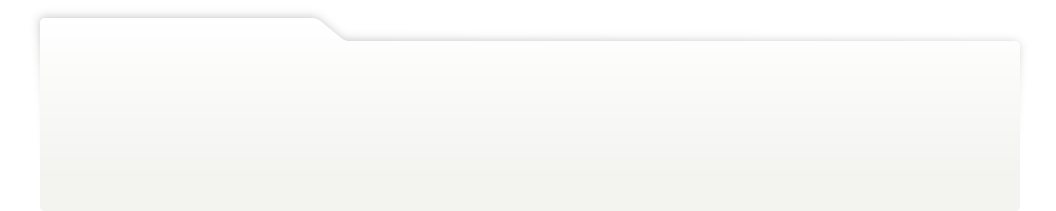
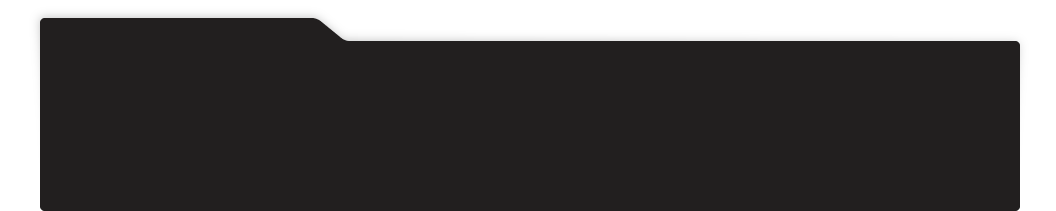
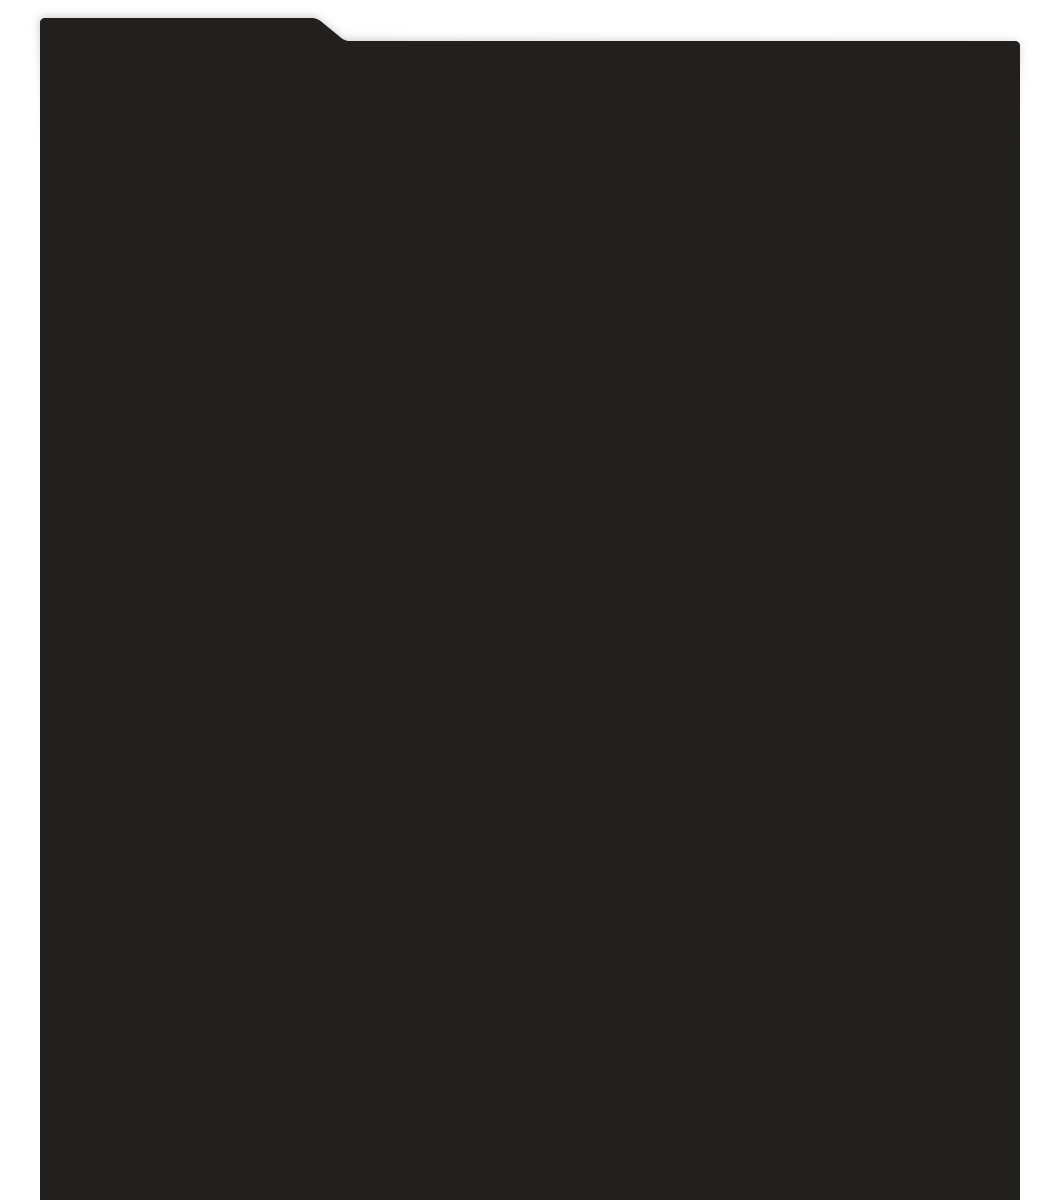
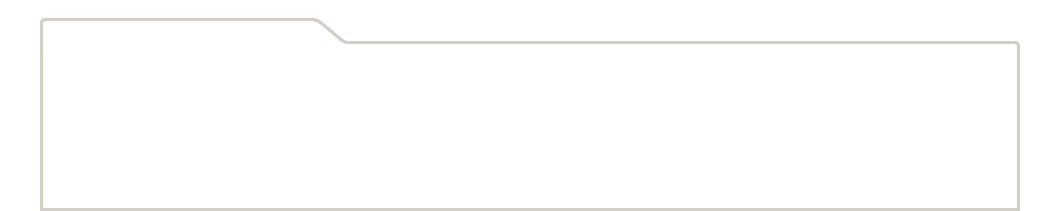
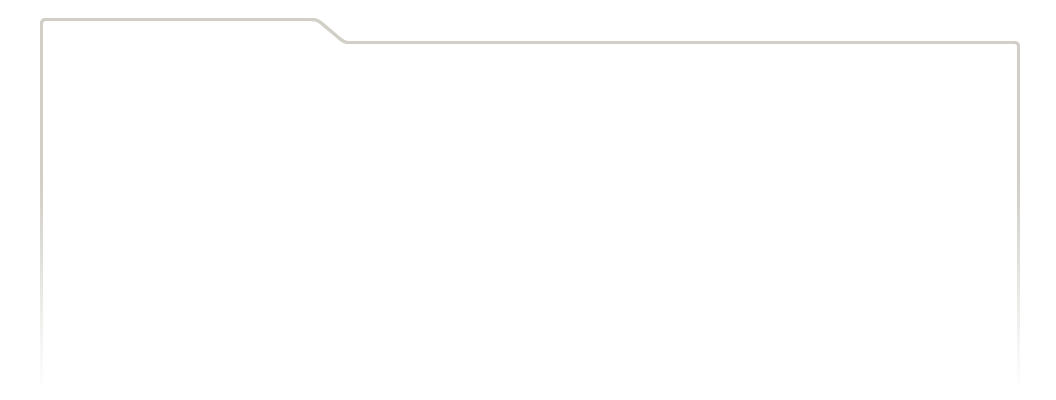
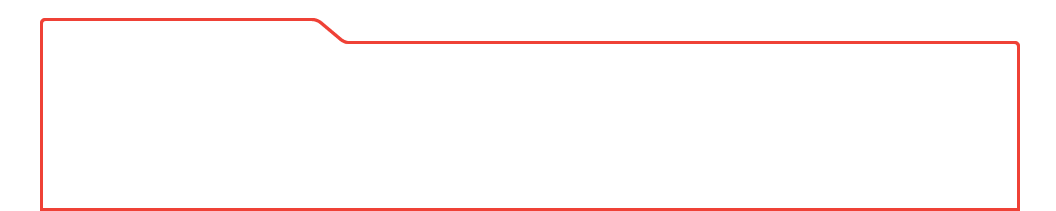
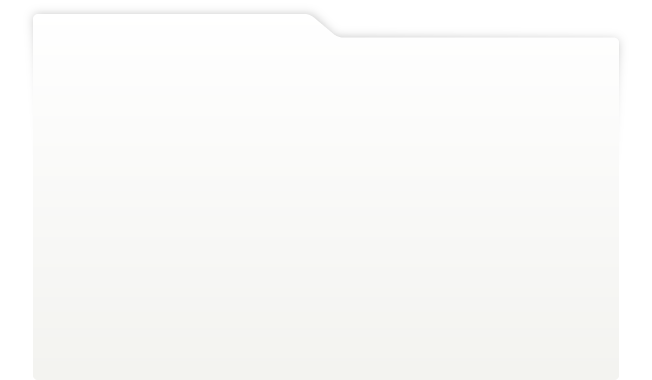
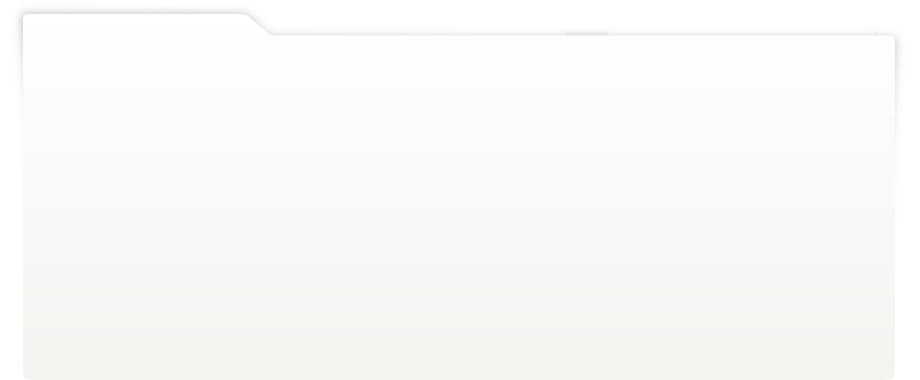
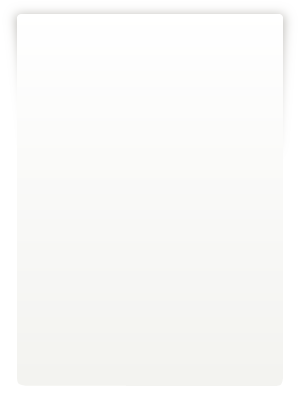
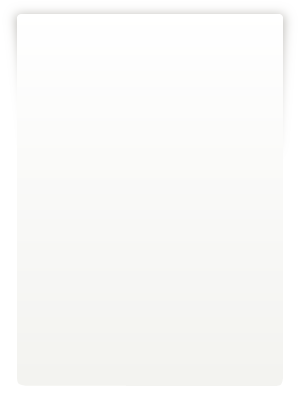
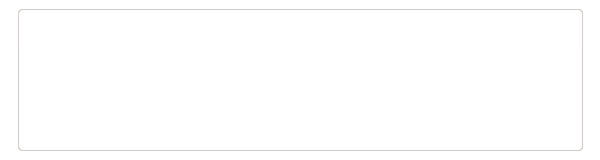
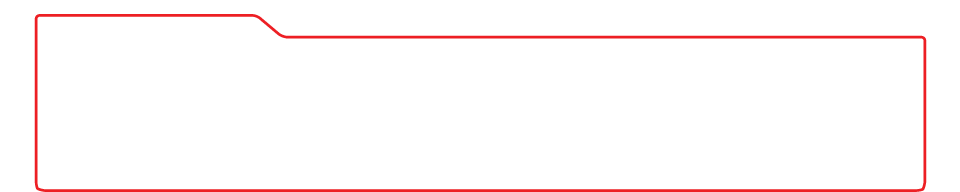
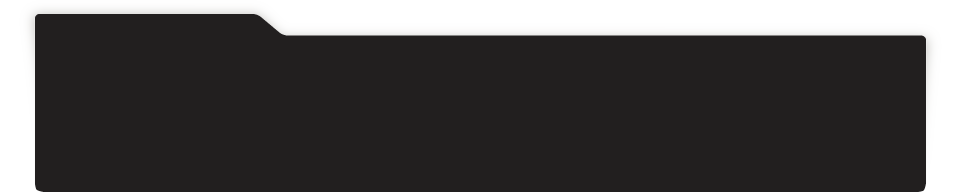
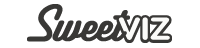
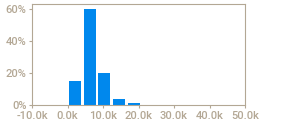
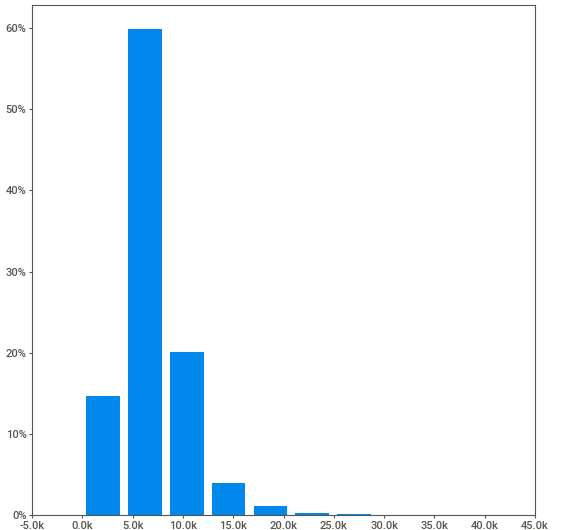
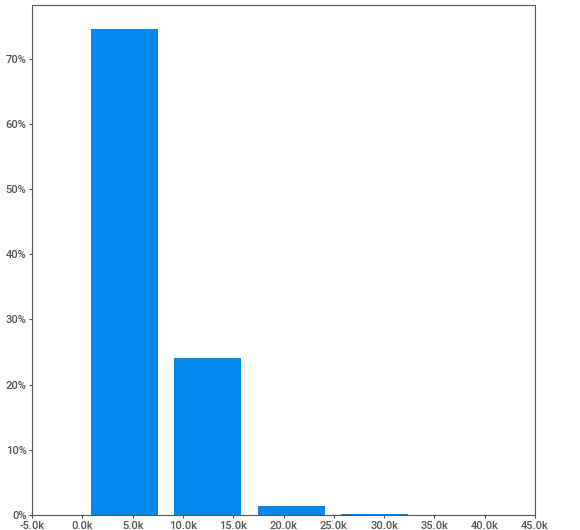
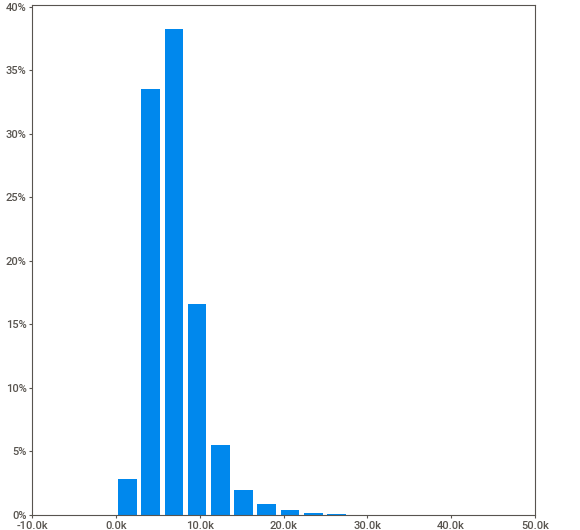
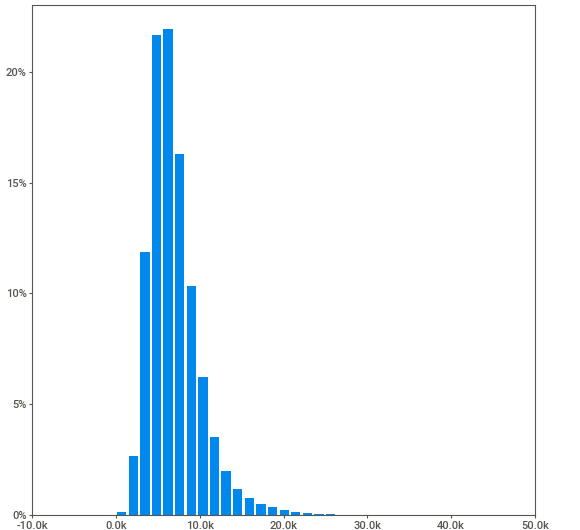
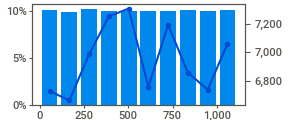
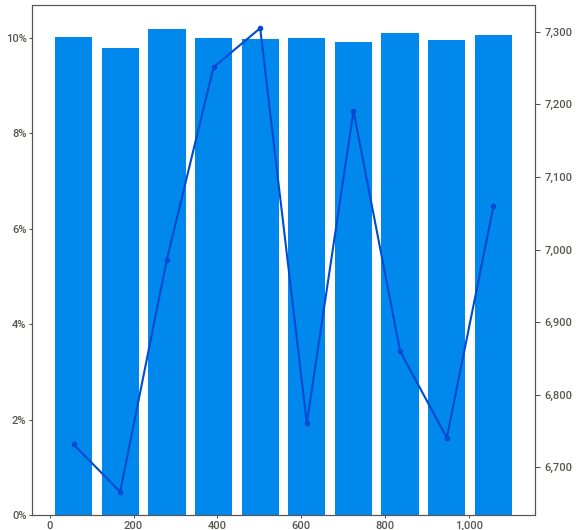
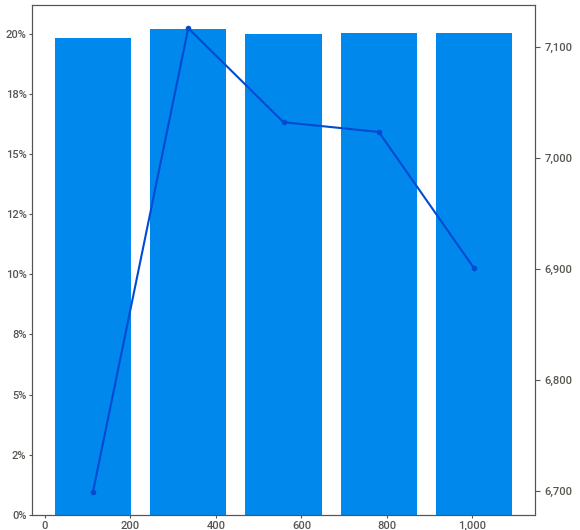
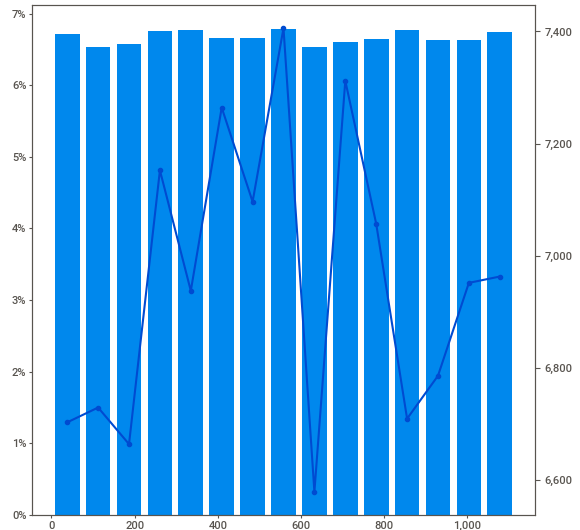
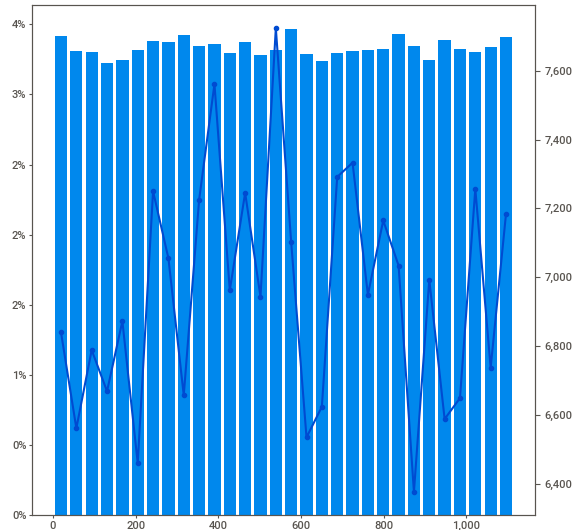
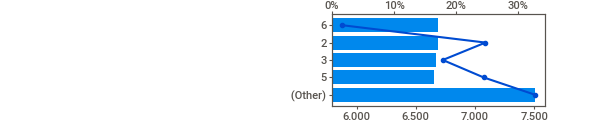
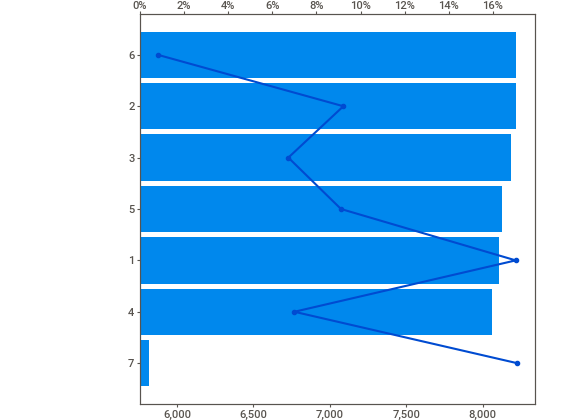
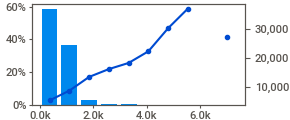
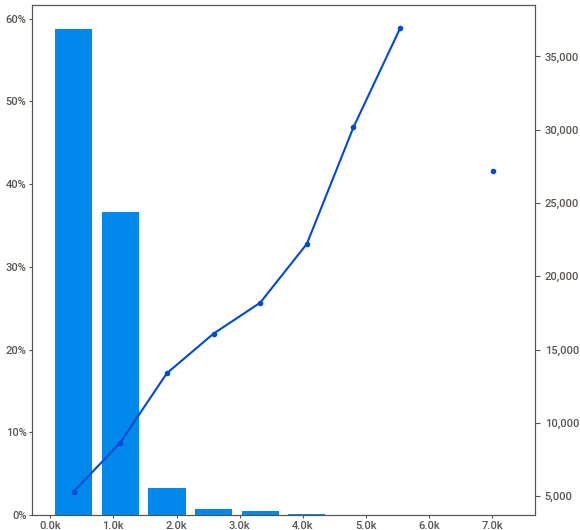
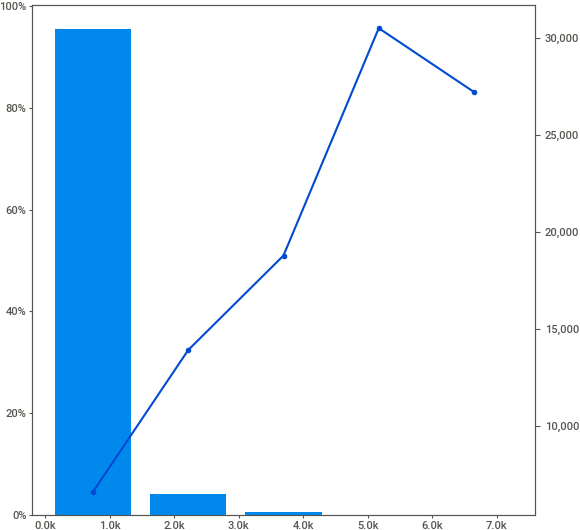
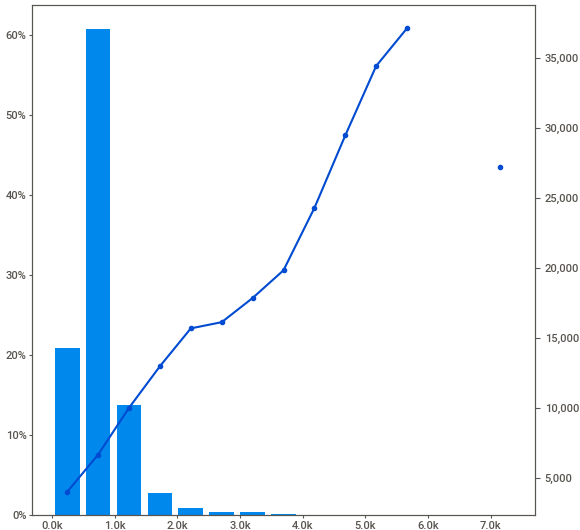
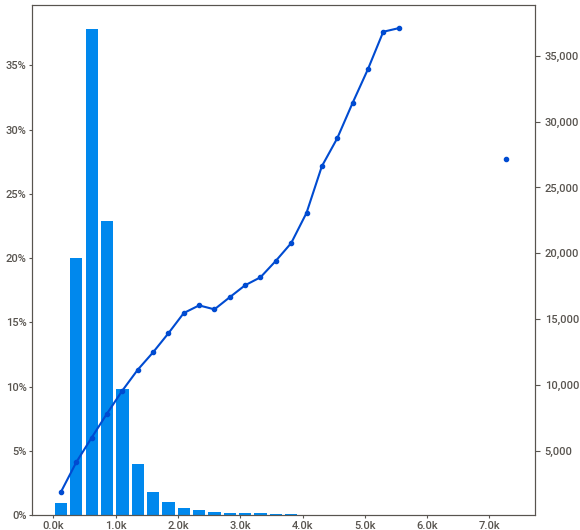
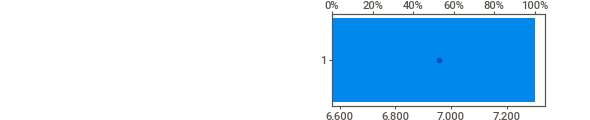
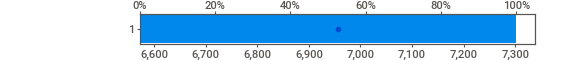
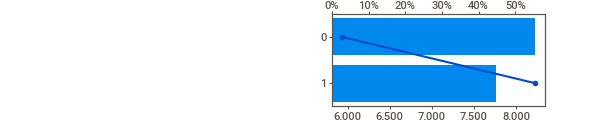
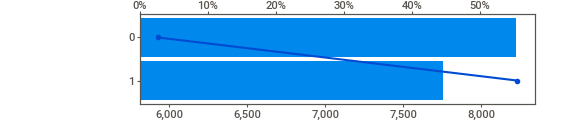
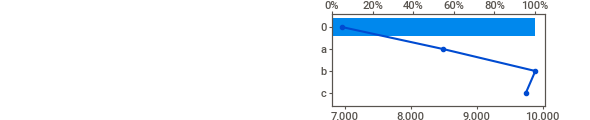
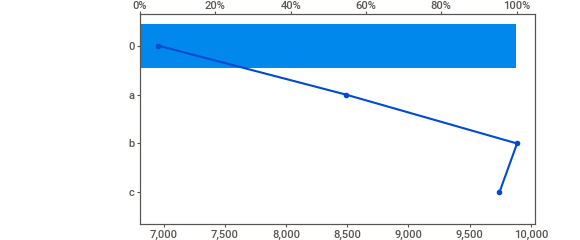
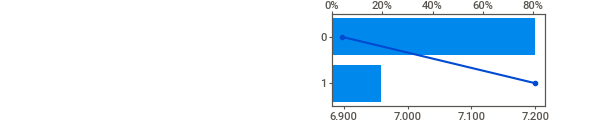
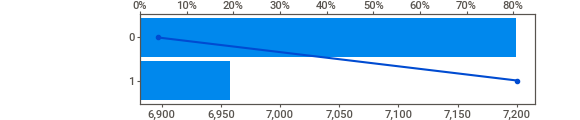
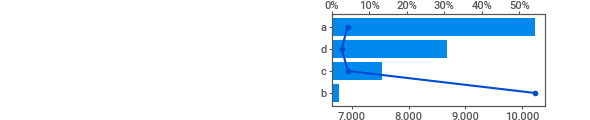
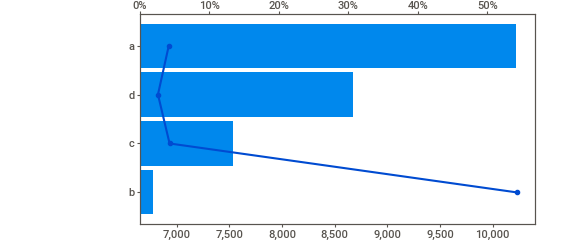
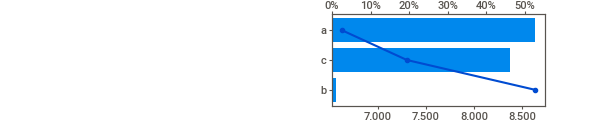
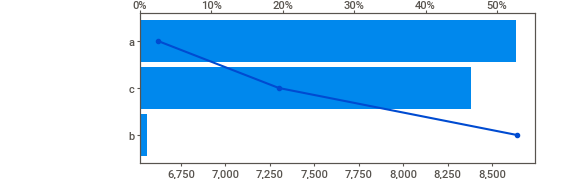
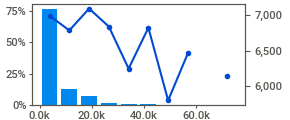
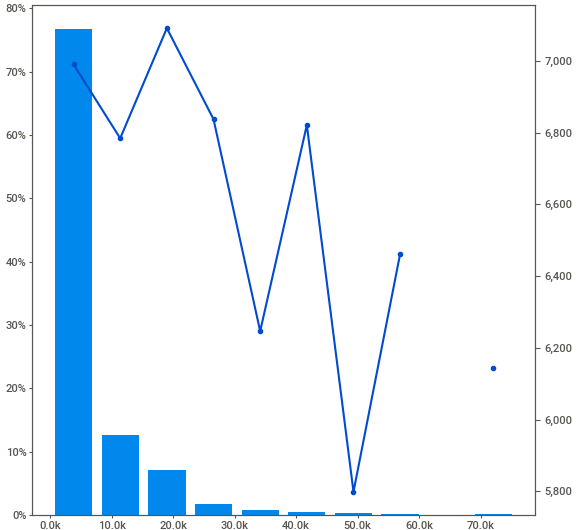
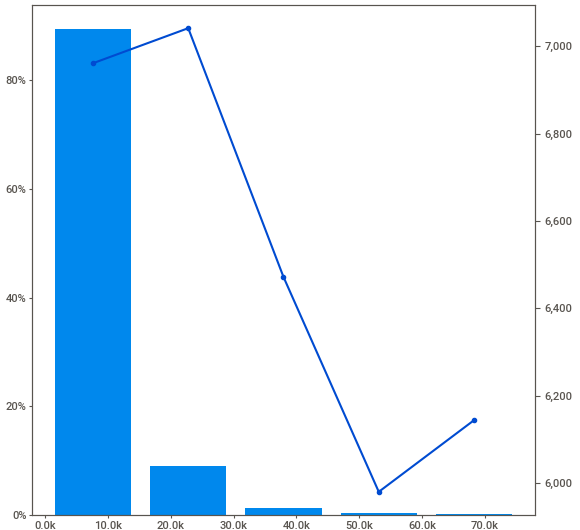
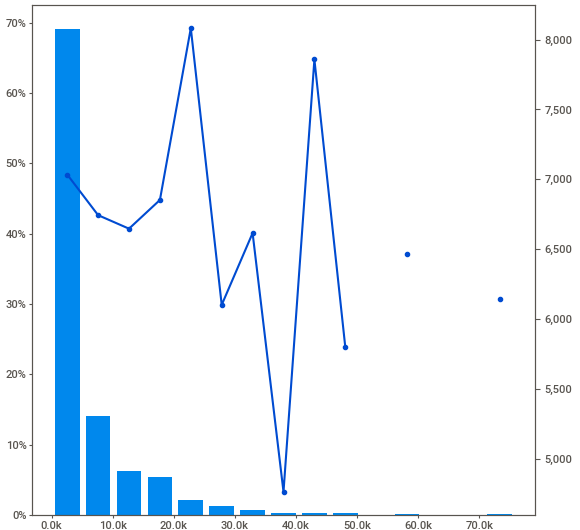
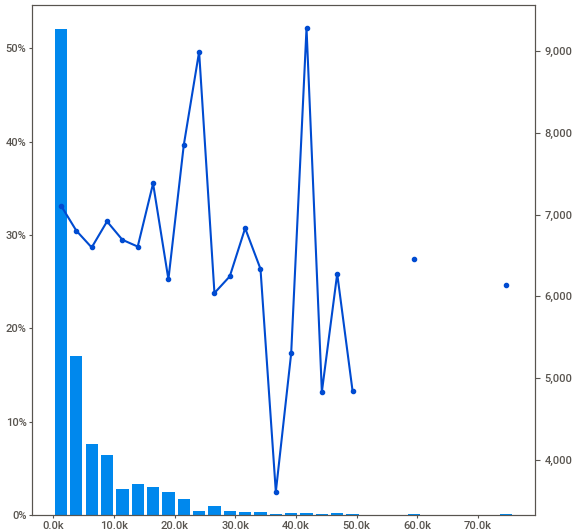
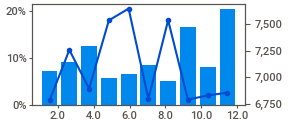
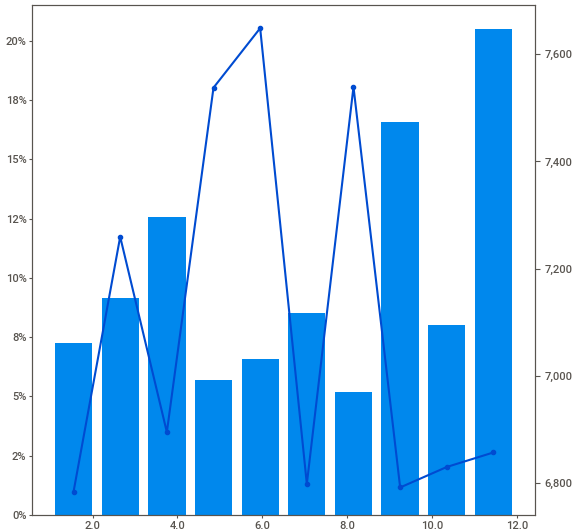
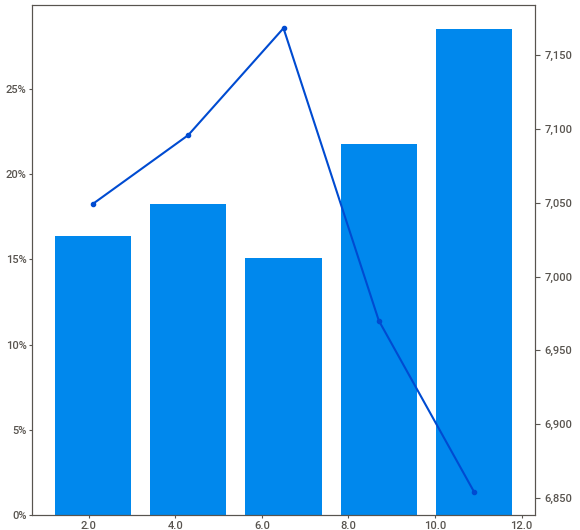
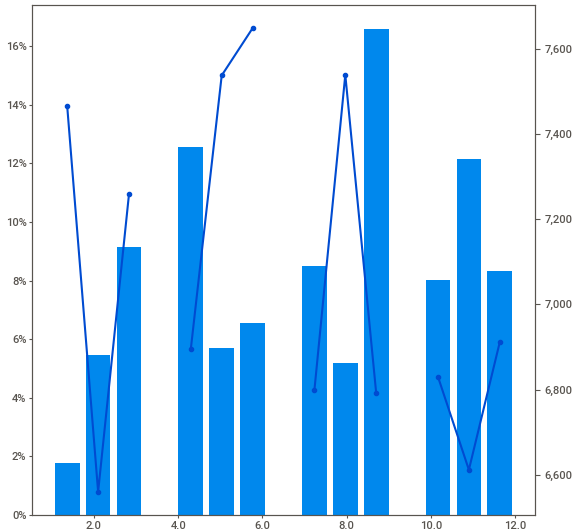
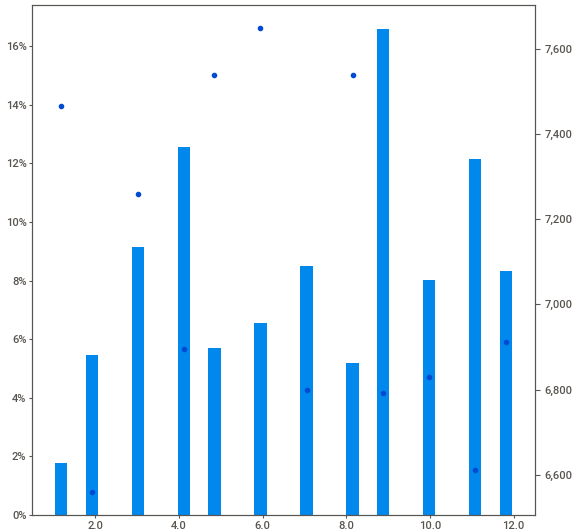
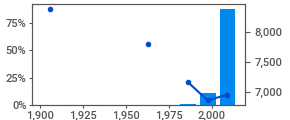
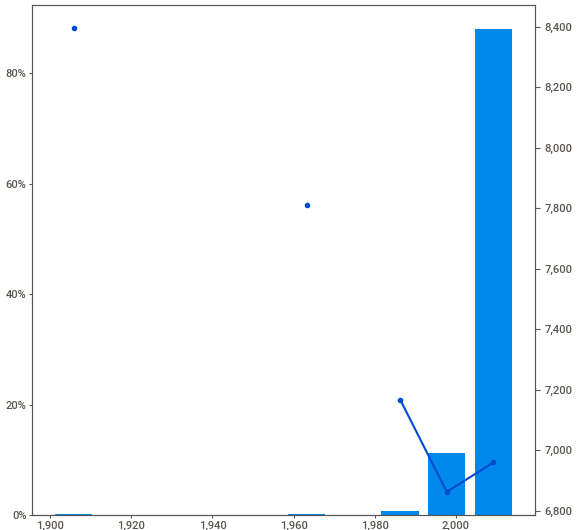
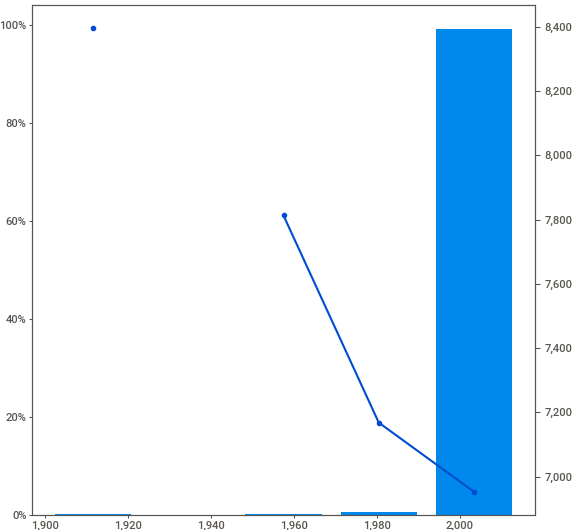
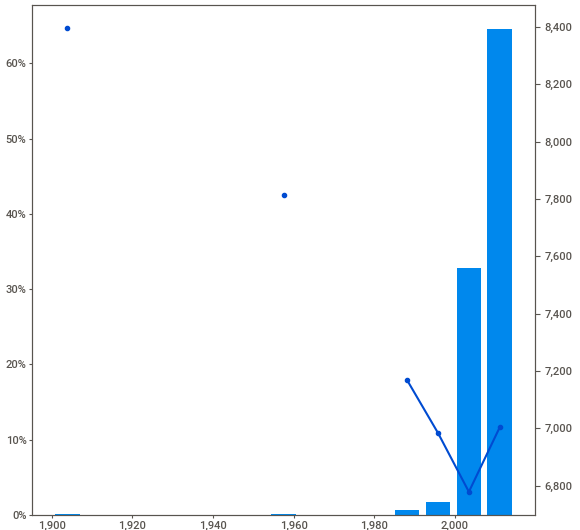
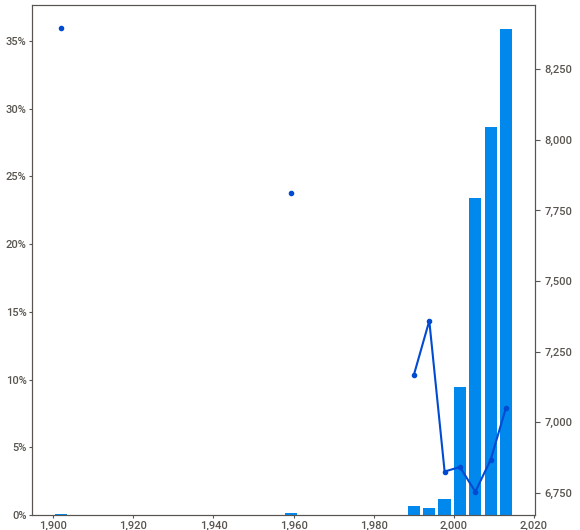
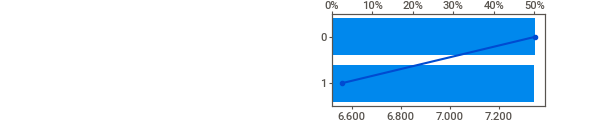
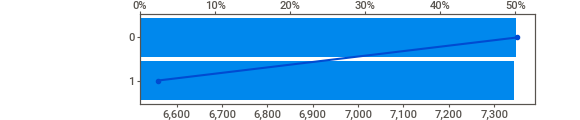
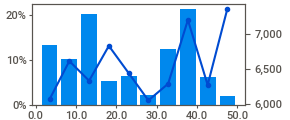
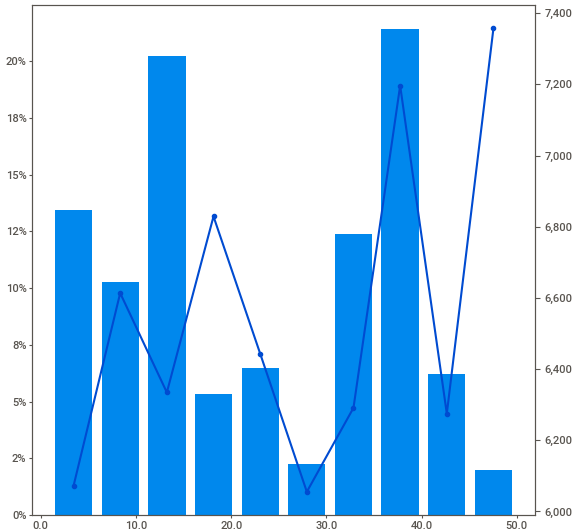
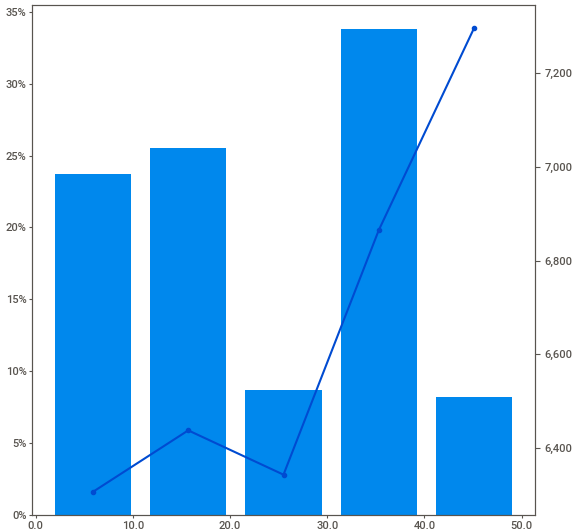
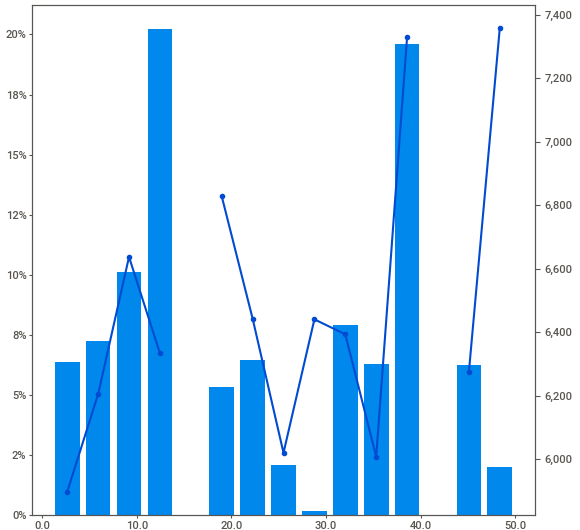
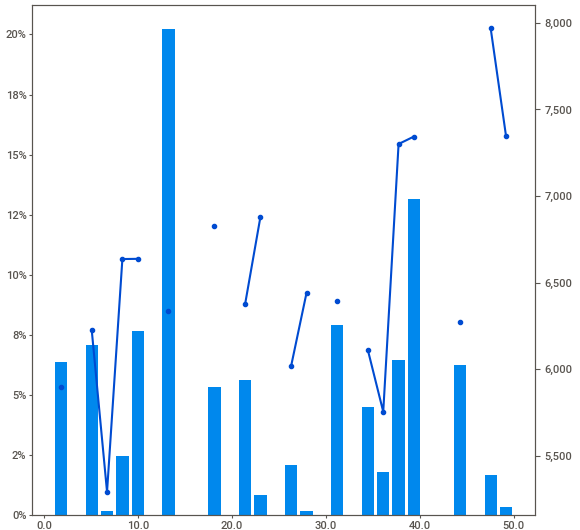
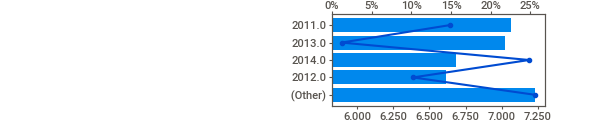
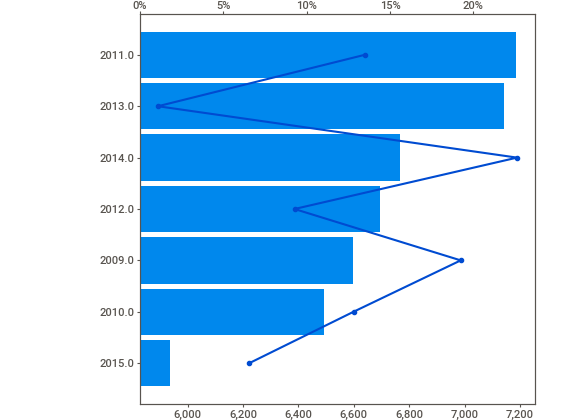
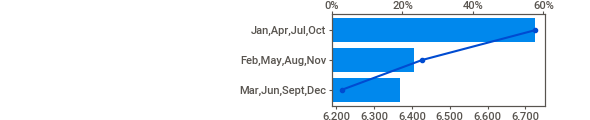
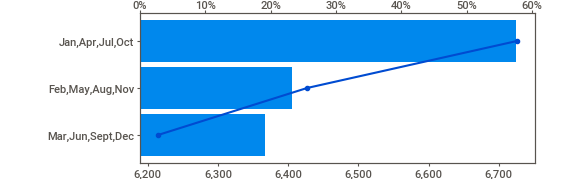
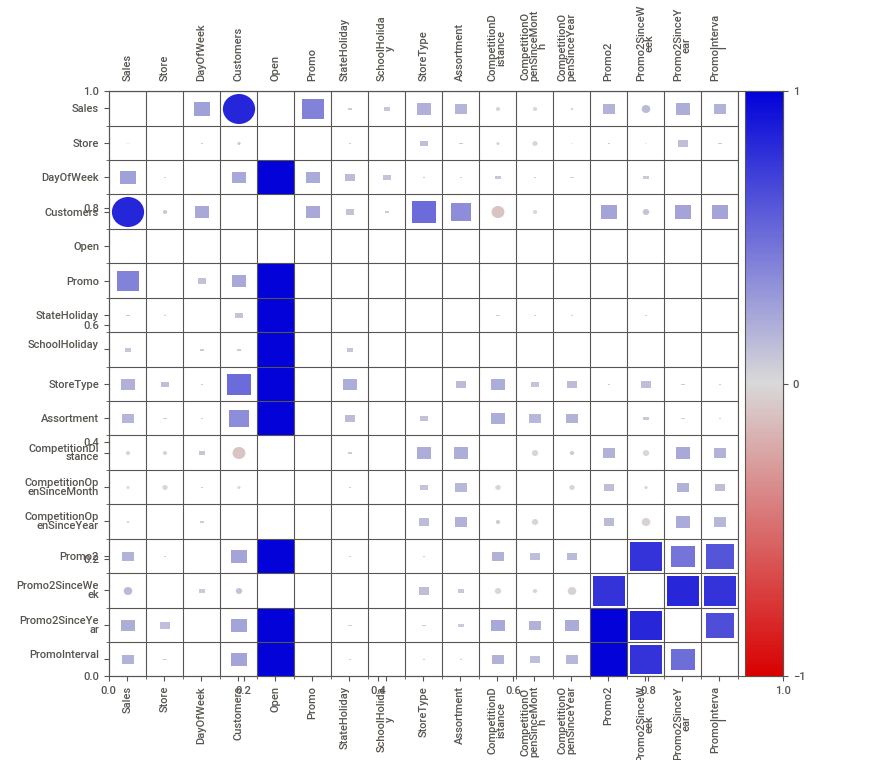
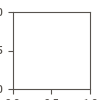

In [8]:
#Feature engineering 'delivery_time_minutes = target_col'
my_report = sv.analyze(merged_train_df,'Sales')
my_report.show_notebook(w="100%", h="full")

In [9]:
#Split date into day,week,month and year column
def split_date(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df['Year'] = df.Date.dt.year
    df['Month'] = df.Date.dt.month
    df['Day'] = df.Date.dt.day
    df['WeekOfYear'] = df.Date.dt.isocalendar().week

split_date(merged_train_df)
split_date(merged_test_df)

In [10]:
#Standardize CompetitionOpenSince[Months + Years] into months
def comp_months(df):
    df['CompetitionOpen'] = 12 * (df.Year - df.CompetitionOpenSinceYear) + (df.Month - df.CompetitionOpenSinceMonth)
    df['CompetitionOpen'] = df['CompetitionOpen'].map(lambda x: 0 if x < 0 else x).fillna(0)

comp_months(merged_train_df)
comp_months(merged_test_df)

In [11]:
#Add new column to indicate how long Promo2 been running and if there's new Promo2 in current month
def check_promo_month(row):
    month2str = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',              
                 7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}
    try:
        months = (row['PromoInterval'] or '').split(',')
        if row['Promo2Open'] and month2str[row['Month']] in months:
            return 1
        else:
            return 0
    except Exception:
        return 0

def promo_cols(df):
    # Months since Promo2 was open
    df['Promo2Open'] = 12 * (df.Year - df.Promo2SinceYear) +  (df.WeekOfYear - df.Promo2SinceWeek)*7/30.5
    df['Promo2Open'] = df['Promo2Open'].map(lambda x: 0 if x < 0 else x).fillna(0) * df['Promo2']
    # Whether a new round of promotions was started in the current month
    df['IsPromo2Month'] = df.apply(check_promo_month, axis=1) * df['Promo2']

promo_cols(merged_train_df)
promo_cols(merged_test_df)

In [12]:
merged_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 844392 entries, 0 to 1017190
Data columns (total 25 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Store                      844392 non-null  int64         
 1   DayOfWeek                  844392 non-null  int64         
 2   Date                       844392 non-null  datetime64[ns]
 3   Sales                      844392 non-null  int64         
 4   Customers                  844392 non-null  int64         
 5   Open                       844392 non-null  int64         
 6   Promo                      844392 non-null  int64         
 7   StateHoliday               844392 non-null  object        
 8   SchoolHoliday              844392 non-null  int64         
 9   StoreType                  844392 non-null  object        
 10  Assortment                 844392 non-null  object        
 11  CompetitionDistance        842206 non-null  float64     

In [13]:
# Always parquet after cleaning data/feature engineering

#merged_train_df.to_parquet('merged_train_df')
#merged_test_df.to_parquet('merged_test_df')

#merged_train_df = pd.read_parquet('merged_train_df')
#merged_test_df = pd.read_parquet('merged_test_df')

In [14]:
#Remove outliers (optional)
def remove_outliers_iqr(df):
    df_cleaned = df.copy()
    
    for column in df_cleaned.select_dtypes(include=['float64', 'int64', 'int32', 'UInt32']).columns:
        Q1 = df_cleaned[column].quantile(0.25)
        Q3 = df_cleaned[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_cleaned = df_cleaned[(df_cleaned[column] >= lower_bound) & (df_cleaned[column] <= upper_bound)]
    
    return df_cleaned

cleaned_train_df = remove_outliers_iqr(merged_train_df)
cleaned_test_df = remove_outliers_iqr(merged_test_df)

In [17]:
#Split train & validation set (test set provided)
from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(cleaned_train_df, test_size=0.2, random_state=42)

print('train_df.shape: ',train_df.shape)
print('val_df.shape: ',val_df.shape)
print('clean_train_df.shape: ',cleaned_train_df.shape)

train_df.shape:  (155630, 25)
val_df.shape:  (38908, 25)
clean_train_df.shape:  (194538, 25)


In [18]:
#Set Input & Target columns (method 2)
input_cols = ['Store', 'DayOfWeek', 'Promo', 'StateHoliday', 'SchoolHoliday', 
              'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpen', 
              'Day', 'Month', 'Year', 'WeekOfYear',  'Promo2', 
              'Promo2Open', 'IsPromo2Month']
target_col = 'Sales'

train_inputs = train_df[input_cols].copy()
train_target = train_df[target_col].copy()

val_inputs = val_df[input_cols].copy()
val_target = val_df[target_col].copy()

test_inputs = cleaned_test_df[input_cols].copy()

In [19]:
#Features are for impute,scale & encode
numerical_features = [
    'Store', 'DayOfWeek', 'Promo', 'SchoolHoliday', 'CompetitionDistance', 'CompetitionOpen',
    'Day', 'Month', 'Year', 'WeekOfYear', 'Promo2', 'Promo2Open', 'IsPromo2Month'
]
categorical_features = [
    'StateHoliday', 'StoreType', 'Assortment'
]

In [20]:
#Preprocessor for pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler()),
            ('pca', PCA(n_components=0.95)) 
        ]), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ])

#Models to train with default hyperparameter
models = {
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'GradientBoosting': GradientBoostingRegressor(),
    'AdaBoost': AdaBoostRegressor(base_estimator=DecisionTreeRegressor()),
    'XGBoost': XGBRegressor(),
    'CatBoost': CatBoostRegressor(verbose=0)
}

#Creating pipeline
def create_pipeline(model):
    return Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])

In [21]:
results = {}
for name, model in tqdm(models.items(), desc="Evaluating Models"):
    pipeline = create_pipeline(model)
    pipeline.fit(train_inputs, train_target)
    y_pred = pipeline.predict(val_inputs)
    
    mse = mean_squared_error(val_target, y_pred, squared=False)
    mae = mean_absolute_error(val_target, y_pred)
    r2 = r2_score(val_target, y_pred)
    
    results[name] = {'MSE': mse, 'MAE': mae, 'R^2': r2}

for model_name, metrics in results.items():
    print(f"{model_name}: MSE={metrics['MSE']:.2f}, MAE={metrics['MAE']:.2f}, R^2={metrics['R^2']:.2f}")

Evaluating Models: 100%|██████████| 6/6 [09:55<00:00, 99.31s/it] 

Ridge: MSE=1969.05, MAE=1548.25, R^2=0.24
Lasso: MSE=1969.46, MAE=1548.62, R^2=0.24
GradientBoosting: MSE=1842.70, MAE=1440.55, R^2=0.34
AdaBoost: MSE=1142.54, MAE=787.55, R^2=0.75
XGBoost: MSE=1390.98, MAE=1053.81, R^2=0.62
CatBoost: MSE=1373.52, MAE=1040.09, R^2=0.63


In [22]:
#Top 3 model AdaBoost(1), CatBoost(2), XGBoost(3)
#AdaBoost: MSE=1142.54, MAE=787.55, R^2=0.75
#CatBoost: MSE=1373.52, MAE=1040.09, R^2=0.63
#XGBoost: MSE=1390.98, MAE=1053.81, R^2=0.62

#Worst model
#Lasso: MSE=1969.46, MAE=1548.62, R^2=0.24

In [23]:
#Helper Function to Tune Hyperparameter
import matplotlib.pyplot as plt

def test_params(ModelClass, **params):
    """Trains a model with the given parameters and returns training & validation RMSE"""
    pipeline = create_pipeline(ModelClass(**params))
    model = pipeline.fit(train_inputs, train_target)
    train_rmse = mean_squared_error(model.predict(train_inputs), train_target, squared=False)
    val_rmse = mean_squared_error(model.predict(val_inputs), val_target, squared=False)
    return train_rmse, val_rmse

def test_param_and_plot(ModelClass, param_name, param_values, **other_params):
    """Trains multiple models by varying the value of param_name according to param_values"""
    train_errors, val_errors = [], [] 
    for value in param_values:
        params = dict(other_params)
        params[param_name] = value
        train_rmse, val_rmse = test_params(ModelClass, **params)
        train_errors.append(train_rmse)
        val_errors.append(val_rmse)
    
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('RMSE')
    plt.legend(['Training', 'Validation'])
    plt.show()

In [24]:
#basic hyperparameter
basic_params = {
    'random_state': 42,
    'learning_rate': 0.9
}

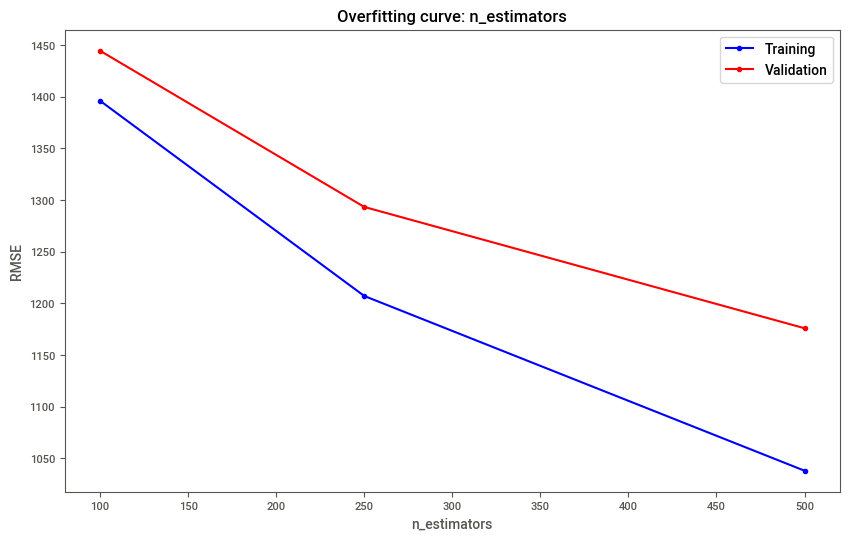

In [25]:
test_param_and_plot(CatBoostRegressor, 'n_estimators', [100, 250, 500], verbose=0, **basic_params)

In [26]:
#Above template can be use to fine tune the parameter each model(pick elbow at each graph).
#Due to computation capability, default parameter is use for ensemble. :)

In [28]:
#Ensembling
#Creating pipeline
def create_ensemble_pipeline(model):
    return Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])

#Models for ensembling
best_models = {
    'CatBoost': CatBoostRegressor(verbose=0),
    'AdaBoost': AdaBoostRegressor(base_estimator=DecisionTreeRegressor()),
}

#StackingRegressor & VotingRegressor
stacking_regressor = StackingRegressor(
    estimators=[
        ('catboost', best_models['CatBoost']),
        ('adaboost', best_models['AdaBoost']),
    ],
    final_estimator=XGBRegressor()
)

voting_regressor = VotingRegressor(
    estimators=[
        ('catboost', best_models['CatBoost']),
        ('adaboost', best_models['AdaBoost']),
    ]
)

ensemble_models = {
    'Stacking': create_ensemble_pipeline(stacking_regressor),
    'Voting': create_ensemble_pipeline(voting_regressor)
}

In [29]:
ensemble_results = {}
for name, pipeline in tqdm(ensemble_models.items(), desc="Evaluating Ensemble Models"):
    pipeline.fit(train_inputs, train_target)
    y_pred = pipeline.predict(val_inputs)
    
    mse = mean_squared_error(val_target, y_pred, squared=False)
    mae = mean_absolute_error(val_target, y_pred)
    r2 = r2_score(val_target, y_pred)
    
    ensemble_results[name] = {'MSE': mse, 'MAE': mae, 'R^2': r2}

print("\nEnsemble Results:")
for model_name, metrics in ensemble_results.items():
    print(f"{model_name}: MSE={metrics['MSE']:.2F}, MAE={metrics['MAE']:.2F}, R^2={metrics['R^2']:.2F}")

Evaluating Ensemble Models: 100%|██████████| 2/2 [35:49<00:00, 1074.90s/it]


Ensemble Results:
Stacking: MSE=1102.01, MAE=777.32, R^2=0.76
Voting: MSE=1175.53, MAE=861.93, R^2=0.73


In [30]:
#Ensemble Results:
#Stacking: MSE=1102.01, MAE=777.32, R^2=0.76
#Voting: MSE=1175.53, MAE=861.93, R^2=0.73

#Stacking better than Voting

In [42]:
# Helper function for final model (voting = CatBoost + AdaBoost)
# .fit(better use all data. For computation efficiency, reduce dataset)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler()),
            ('pca', PCA(n_components=0.95)) 
        ]), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ])

best_models = {
    'CatBoost': CatBoostRegressor(verbose=0),
    'AdaBoost': AdaBoostRegressor(base_estimator=DecisionTreeRegressor()),
}

stacking_regressor = StackingRegressor(
    estimators=[
        ('catboost', best_models['CatBoost']),
        ('adaboost', best_models['AdaBoost']),
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', stacking_regressor)
])

pipeline.fit(train_inputs, train_target)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('pca',
                                                                   PCA(n_components=0.95))]),
                                                  ['Store', 'DayOfWeek',
                                                   'Promo', 'SchoolHoliday',
                                                   'CompetitionDistance',
                                                   'CompetitionOpen', 'Day',
                                                   'Month', 'Year',
                                                   'WeekOfYear', 'Promo2',
                                                   'Promo2Open',
                                                   'IsPromo2Month']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['StateHoliday', 'StoreType',
                                                   'Assortment'])])),
                ('model',
                 StackingRegressor(estimators=[('catboost',
                                                <catboost.core.CatBoostRegressor object at 0x000001F54FE960C0>),
                                               ('adaboost',
                                                AdaBoostRegressor(base_estimator=DecisionTreeRegressor()))]))])

In [43]:
#Helper function for single input
def predict_sales(input_data):
    input_df = pd.DataFrame([input_data])
    prediction = pipeline.predict(input_df)
    return prediction[0]

In [ ]:
example_input = {
    'Store': 418,
    'DayOfWeek': 5,
    'Promo': 0,
    'StateHoliday': 0,
    'SchoolHoliday': 0,
    'StoreType': 'a',
    'Assortment': 'a',
    'CompetitionDistance': 1060.0,
    'CompetitionOpen': 69.0,
    'Day': 13,
    'Month': 2,
    'Year': 2015,
    'WeekOfYear': 7,
    'Promo2': 1,
    'Promo2Open': 43.41,
    'IsPromo2Month': 1
}

predicted_sales = predict_sales(example_input)
print(f'Predicted Sales: {predicted_sales:.2f}')